# POLYNOMIAL LINEAR REGRESSION

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Generate Synthetic Data for Quadratic Equation

In [3]:
# Quadratic Equation y = 0.5x^2 + 1.5x + 2 + noise
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x**2 + 1.5*x + 2 + np.random.randn(100, 1)


### Visualize the Data

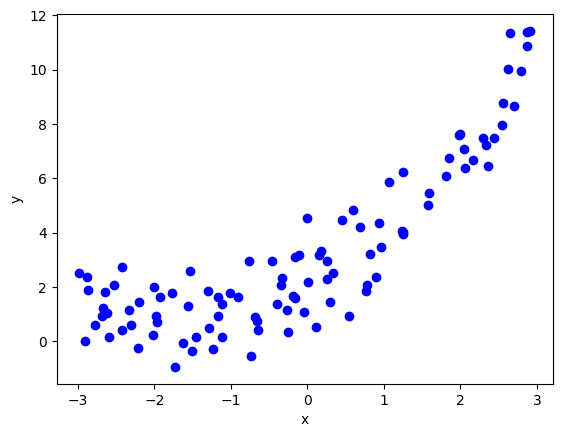

In [5]:
plt.scatter(x, y, color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Simple Linear Regression

### Fit the model

In [7]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [8]:
regression_1.fit(x_train, y_train)

LinearRegression()

#### Evaluate the Model

In [10]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(x_test))
print('R2 Score: ', score)

# We have a poor fit using a linear model. Let's try a polynomial model

R2 Score:  0.5315556829821946


### Visualize Linear Regression Fit

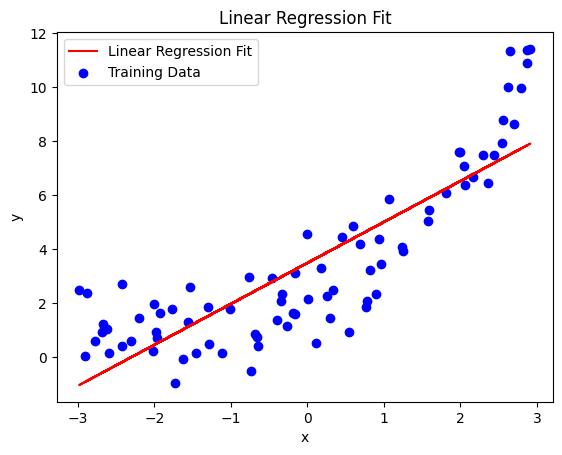

In [13]:
plt.plot(x_train,regression_1.predict(x_train), color = 'red')
plt.scatter(x_train, y_train, color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend(['Linear Regression Fit', 'Training Data'])
plt.show() 

### Polynomial Transformation with Degree of 2

In [14]:
from sklearn.preprocessing import PolynomialFeatures


In [15]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test) 

In [17]:
x_train_poly

#     bias      x1      x1^2

array([[ 1.00000000e+00, -2.87449909e+00,  8.26274503e+00],
       [ 1.00000000e+00,  9.66552163e-01,  9.34223085e-01],
       [ 1.00000000e+00, -2.61836332e+00,  6.85582647e+00],
       [ 1.00000000e+00,  1.84920095e-01,  3.41954414e-02],
       [ 1.00000000e+00, -4.01035359e-01,  1.60829359e-01],
       [ 1.00000000e+00, -2.68357991e+00,  7.20160112e+00],
       [ 1.00000000e+00,  2.69823385e+00,  7.28046590e+00],
       [ 1.00000000e+00, -1.00973893e+00,  1.01957270e+00],
       [ 1.00000000e+00,  3.32935648e-01,  1.10846146e-01],
       [ 1.00000000e+00, -6.44518490e-01,  4.15404084e-01],
       [ 1.00000000e+00,  1.99513194e+00,  3.98055145e+00],
       [ 1.00000000e+00, -7.62707637e-01,  5.81722940e-01],
       [ 1.00000000e+00, -2.01479879e+00,  4.05941417e+00],
       [ 1.00000000e+00,  8.24981431e-01,  6.80594361e-01],
       [ 1.00000000e+00,  2.86686795e+00,  8.21893183e+00],
       [ 1.00000000e+00,  4.58904467e-01,  2.10593310e-01],
       [ 1.00000000e+00, -2.20382762e+00

In [18]:
x_test_poly

array([[ 1.00000000e+00,  1.58217416e-01,  2.50327508e-02],
       [ 1.00000000e+00, -1.02397119e-01,  1.04851700e-02],
       [ 1.00000000e+00, -2.47054964e-01,  6.10361552e-02],
       [ 1.00000000e+00, -1.16107462e+00,  1.34809428e+00],
       [ 1.00000000e+00, -2.87042670e+00,  8.23934946e+00],
       [ 1.00000000e+00, -2.20573564e+00,  4.86526973e+00],
       [ 1.00000000e+00, -4.79313941e-02,  2.29741854e-03],
       [ 1.00000000e+00,  2.62851592e-01,  6.90909596e-02],
       [ 1.00000000e+00, -1.11366438e+00,  1.24024836e+00],
       [ 1.00000000e+00, -2.64285576e+00,  6.98468657e+00],
       [ 1.00000000e+00, -2.52456051e+00,  6.37340577e+00],
       [ 1.00000000e+00, -1.16378213e+00,  1.35438885e+00],
       [ 1.00000000e+00,  1.24407393e+00,  1.54771994e+00],
       [ 1.00000000e+00, -1.51095108e+00,  2.28297318e+00],
       [ 1.00000000e+00, -9.03337958e-01,  8.16019466e-01],
       [ 1.00000000e+00, -1.23226959e+00,  1.51848834e+00],
       [ 1.00000000e+00,  2.33638249e+00

### Fit the Model

In [20]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)


# We have a better fit using a polynomial model compared to linear regression

### Evaluate the Model

In [22]:
score = r2_score(y_test, y_pred)
print('Coefficients: ', regression.coef_)
print('Intercept: ', regression.intercept_)
print('R2 Score: ', score)


Coefficients:  [[0.         1.51150241 0.46580039]]
Intercept:  [2.03445039]
R2 Score:  0.8373294556094688


### Visualize Polynomial Regression Fit

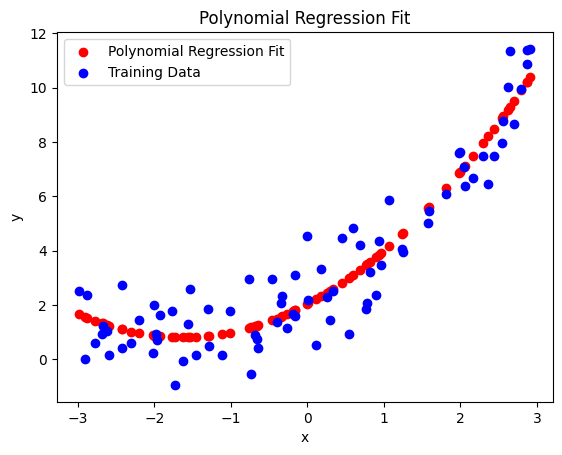

In [24]:
plt.scatter(x_train,regression.predict(x_train_poly), color = 'red')
plt.scatter(x_train, y_train, color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.legend(['Polynomial Regression Fit', 'Training Data'])

plt.show()

### Polynomial Regression with Degree of 3

Apply Polynomial Transofrmation

In [26]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [28]:
x_train_poly

array([[ 1.00000000e+00, -2.87449909e+00,  8.26274503e+00,
        -2.37512531e+01],
       [ 1.00000000e+00,  9.66552163e-01,  9.34223085e-01,
         9.02975344e-01],
       [ 1.00000000e+00, -2.61836332e+00,  6.85582647e+00,
        -1.79510445e+01],
       [ 1.00000000e+00,  1.84920095e-01,  3.41954414e-02,
         6.32342425e-03],
       [ 1.00000000e+00, -4.01035359e-01,  1.60829359e-01,
        -6.44982600e-02],
       [ 1.00000000e+00, -2.68357991e+00,  7.20160112e+00,
        -1.93260721e+01],
       [ 1.00000000e+00,  2.69823385e+00,  7.28046590e+00,
         1.96443995e+01],
       [ 1.00000000e+00, -1.00973893e+00,  1.01957270e+00,
        -1.02950225e+00],
       [ 1.00000000e+00,  3.32935648e-01,  1.10846146e-01,
         3.69046334e-02],
       [ 1.00000000e+00, -6.44518490e-01,  4.15404084e-01,
        -2.67735613e-01],
       [ 1.00000000e+00,  1.99513194e+00,  3.98055145e+00,
         7.94172532e+00],
       [ 1.00000000e+00, -7.62707637e-01,  5.81722940e-01,
      

### Fit the Model

In [29]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)



### Evaluate the Model

In [31]:
score = r2_score(y_test, y_pred)
print('R2 Score (Polynomial Model, Degree 3): ', score)

R2 Score (Polynomial Model, Degree 3):  0.811452143531157


### Predicition and Visualization of new data

In [34]:
x_new = np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly.transform(x_new)  
x_new_poly 

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.93939394e+00,  8.64003673e+00,
        -2.53964716e+01],
       [ 1.00000000e+00, -2.87878788e+00,  8.28741965e+00,
        -2.38577232e+01],
       [ 1.00000000e+00, -2.81818182e+00,  7.94214876e+00,
        -2.23824192e+01],
       [ 1.00000000e+00, -2.75757576e+00,  7.60422406e+00,
        -2.09692239e+01],
       [ 1.00000000e+00, -2.69696970e+00,  7.27364555e+00,
        -1.96168016e+01],
       [ 1.00000000e+00, -2.63636364e+00,  6.95041322e+00,
        -1.83238167e+01],
       [ 1.00000000e+00, -2.57575758e+00,  6.63452709e+00,
        -1.70889334e+01],
       [ 1.00000000e+00, -2.51515152e+00,  6.32598714e+00,
        -1.59108162e+01],
       [ 1.00000000e+00, -2.45454545e+00,  6.02479339e+00,
        -1.47881292e+01],
       [ 1.00000000e+00, -2.39393939e+00,  5.73094582e+00,
        -1.37195370e+01],
       [ 1.00000000e+00, -2.33333333e+00,  5.44444444e+00,
      

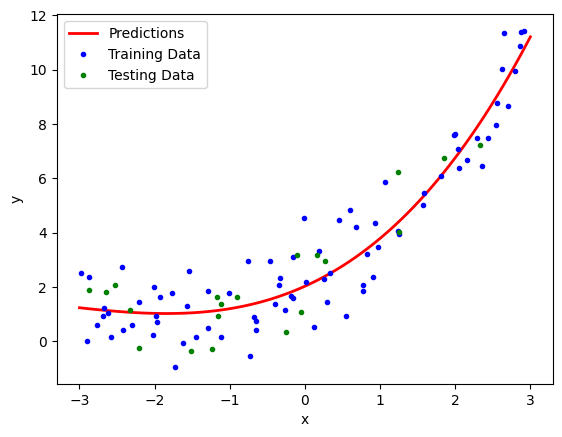

In [35]:
y_new = regression.predict(x_new_poly)
plt.plot(x_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(x_train, y_train, 'b.', label='Training Data')
plt.plot(x_test, y_test, 'g.', label='Testing Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()